In [ ]:
import pandas as pd
import numpy as np
!pip install openpyxl
!pip install pandas numpy scikit-learn matplotlib seaborn xgboost lightgbm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load the dataset
file_path = '/content/Fraud Detection.xlsx'  # Update this path as needed
df = pd.read_excel(file_path)

# Preview the data
print(df.head())
print(df.info())

   step     type          branch   amount     nameOrig  oldbalanceOrg  \
0     7  PAYMENT          Espana  1526.50  C1908839976            0.0   
1     7  PAYMENT        Honduras  1620.17    C70432899            0.0   
2     7  PAYMENT       Indonesia  5689.82   C332151172            0.0   
3     7  PAYMENT  Estados Unidos  2211.07  C1148172078            0.0   
4     7  PAYMENT  Estados Unidos   824.63  C1142006014            0.0   

   newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  unusuallogin  \
0             0.0  M1304522697             0.0             0.0             7   
1             0.0   M252297858             0.0             0.0             2   
2             0.0  M1430674428             0.0             0.0             3   
3             0.0   M650835126             0.0             0.0            13   
4             0.0   M745868137             0.0             0.0             7   

   isFlaggedFraud Acct type Date of transaction Time of day isFraud  Column1  \


In [ ]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
print("Numeric Columns:\n", numeric_cols)

Numeric Columns:
 Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'unusuallogin', 'isFlaggedFraud', 'Column1',
       'isFraud - Copy', 'DayOfWeek'],
      dtype='object')


In [ ]:
# Fill missing values for numeric columns with their mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [ ]:
#Handle no-numeric coulmns
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", categorical_cols)

# Fill missing values for categorical columns with their mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

Categorical Columns:
 Index(['type', 'branch', 'nameOrig', 'nameDest', 'Acct type', 'Time of day',
       'isFraud', 'DayOfWeek(new)'],
      dtype='object')


<ipython-input-14-7af7cbe7f7ee>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Normalize the data (example: Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=['number'])), columns=numeric_cols)

# Display the first few rows of the scaled DataFrame
df_scaled.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Column1,isFraud - Copy,DayOfWeek
0,1.0,0.000152,0.0,0.0,0.0,0.0,0.35,0.0,0.707881,0.0,0.333333
1,1.0,0.000162,0.0,0.0,0.0,0.0,0.10,0.0,0.712127,0.0,0.666667
2,1.0,0.000569,0.0,0.0,0.0,0.0,0.15,0.0,0.717756,0.0,1.000000
3,1.0,0.000221,0.0,0.0,0.0,0.0,0.65,0.0,0.723385,0.0,0.833333
4,1.0,0.000082,0.0,0.0,0.0,0.0,0.35,0.0,0.723484,0.0,0.833333


In [ ]:
import numpy as np

# Example: Create a new feature based on existing data
# Assuming 'transaction_amount' is a column in the DataFrame
# Check if 'transaction_amount' exists in the DataFrame
if 'transaction_amount' in df_scaled.columns:
    df_scaled['transaction_amount_log'] = np.log(df_scaled['transaction_amount'] + 1)

# Example: Create a feature for transaction frequency (if you have a 'transaction_date' column)
# Assuming 'transaction_date' is a column in the original DataFrame
if 'transaction_date' in df.columns:
    df['transaction_date'] = pd.to_datetime(df['transaction_date'])
    df['transaction_day'] = df['transaction_date'].dt.day
    df['transaction_month'] = df['transaction_date'].dt.month
    df['transaction_year'] = df['transaction_date'].dt.year

# Display the updated DataFrame
df_scaled.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Column1,isFraud - Copy,DayOfWeek
0,1.0,0.000152,0.0,0.0,0.0,0.0,0.35,0.0,0.707881,0.0,0.333333
1,1.0,0.000162,0.0,0.0,0.0,0.0,0.10,0.0,0.712127,0.0,0.666667
2,1.0,0.000569,0.0,0.0,0.0,0.0,0.15,0.0,0.717756,0.0,1.000000
3,1.0,0.000221,0.0,0.0,0.0,0.0,0.65,0.0,0.723385,0.0,0.833333
4,1.0,0.000082,0.0,0.0,0.0,0.0,0.35,0.0,0.723484,0.0,0.833333


In [ ]:
# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas

# If you haven't already, load your dataset
file_path = '/content/Fraud Detection.csv'  # Update this path as needed
df = pd.read_csv(file_path) # Changed from read_excel to read_csv

# Check if 'transaction_amount' column exists
if 'transaction_amount' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['transaction_amount'], bins=30, kde=True, color='skyblue')
    plt.title('Distribution of Transaction Amounts', fontsize=16)
    plt.xlabel('Transaction Amount', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True)
    plt.show()
else:
    print("Column 'transaction_amount' not found in the DataFrame!")

Column 'transaction_amount' not found in the DataFrame!


In [ ]:
# Normalize the data (example: Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Get numeric columns from the current DataFrame 'df'
numeric_cols = df.select_dtypes(include=['number']).columns

df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=['number'])), columns=numeric_cols)

# Display the first few rows of the scaled DataFrame
df_scaled.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Column1,isFraud - Copy,DayOfWeek
0,1.0,0.000152,0.0,0.0,0.0,0.0,0.35,0.0,0.707881,0.0,0.333333
1,1.0,0.000162,0.0,0.0,0.0,0.0,0.10,0.0,0.712127,0.0,0.666667
2,1.0,0.000569,0.0,0.0,0.0,0.0,0.15,0.0,0.717756,0.0,1.000000
3,1.0,0.000221,0.0,0.0,0.0,0.0,0.65,0.0,0.723385,0.0,0.833333
4,1.0,0.000082,0.0,0.0,0.0,0.0,0.35,0.0,0.723484,0.0,0.833333


from matplotlib import pyplot as plt
_df_0['amount'].plot(kind='hist', bins=20, title='amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['unusuallogin'].plot(kind='hist', bins=20, title='unusuallogin')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Column1'].plot(kind='hist', bins=20, title='Column1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['DayOfWeek'].plot(kind='hist', bins=20, title='DayOfWeek')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='amount', y='unusuallogin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='unusuallogin', y='Column1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Column1', y='DayOfWeek', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['step']
  ys = series['amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('step', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('step')
_ = plt.ylabel('amount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['step']
  ys = series['unusuallogin']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('step', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('step')
_ = plt.ylabel('unusuallogin')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['step']
  ys = series['DayOfWeek']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('step', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('step')
_ = plt.ylabel('DayOfWeek')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['step']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'step'}, axis=1)
              .sort_values('step', ascending=True))
  xs = counted['step']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('step', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('step')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['amount'].plot(kind='line', figsize=(8, 4), title='amount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['unusuallogin'].plot(kind='line', figsize=(8, 4), title='unusuallogin')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Column1'].plot(kind='line', figsize=(8, 4), title='Column1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['DayOfWeek'].plot(kind='line', figsize=(8, 4), title='DayOfWeek')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import numpy as np

# Create a log-transformed feature for the amount
if 'amount' in df_scaled.columns:
    df_scaled['amount_log'] = np.log(df_scaled['amount'] + 1)

# If you want to create features based on the day of the week
if 'DayOfWeek' in df_scaled.columns:
    df_scaled['is_weekend'] = df_scaled['DayOfWeek'].apply(lambda x: 1 if x in [5, 6] else 0)  # Assuming 5=Saturday, 6=Sunday

# Display the updated DataFrame
df_scaled.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Column1,isFraud - Copy,DayOfWeek,amount_log,is_weekend
0,1.0,0.000152,0.0,0.0,0.0,0.0,0.35,0.0,0.707881,0.0,0.333333,0.000152,0
1,1.0,0.000162,0.0,0.0,0.0,0.0,0.10,0.0,0.712127,0.0,0.666667,0.000162,0
2,1.0,0.000569,0.0,0.0,0.0,0.0,0.15,0.0,0.717756,0.0,1.000000,0.000569,0
3,1.0,0.000221,0.0,0.0,0.0,0.0,0.65,0.0,0.723385,0.0,0.833333,0.000221,0
4,1.0,0.000082,0.0,0.0,0.0,0.0,0.35,0.0,0.723484,0.0,0.833333,0.000082,0


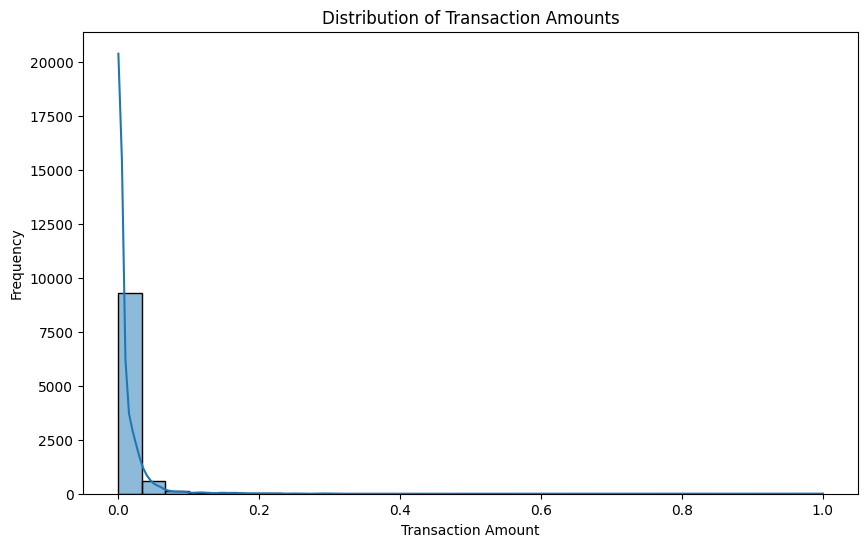

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of transaction amounts
if 'amount' in df_scaled.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_scaled['amount'], bins=30, kde=True)
    plt.title('Distribution of Transaction Amounts')
    plt.xlabel('Transaction Amount')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'amount' not found for visualization.")

In [ ]:
#Now  we need to split the data into training and testing sets.
from sklearn.model_selection import train_test_split

# Use 'isFraud - Copy' as the target variable
X = df_scaled.drop(['isFraud - Copy', 'Column1'], axis=1)  # Features
y = df_scaled['isFraud - Copy']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (8101, 11) (8101,)
Testing set shape: (2026, 11) (2026,)


**SUPERVISED LEARNING MODELS:**
a. logistic Regression



In [ ]:
# Check for NaN values in the training features
print("NaN values in X_train:\n", X_train.isnull().sum())

# Check for NaN values in the target variable
print("NaN values in y_train:\n", y_train.isnull().sum())

NaN values in X_train:
 step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
unusuallogin      0
isFlaggedFraud    0
DayOfWeek         0
amount_log        0
is_weekend        0
dtype: int64
NaN values in y_train:
 0


In [ ]:
# Check data types of the features
print("Data types in X_train:\n", X_train.dtypes)

Data types in X_train:
 step              float64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
unusuallogin      float64
isFlaggedFraud    float64
DayOfWeek         float64
amount_log        float64
is_weekend          int64
dtype: object


In [ ]:
# Check unique values in the target variable
print("Unique values in y_train:\n", y_train.unique())

# Check for NaN values in y_train
print("NaN values in y_train:\n", y_train.isnull().sum())

Unique values in y_train:
 [0.         1.         0.00671605]
NaN values in y_train:
 0


In [ ]:
# Fill NaN values in y_train with the mode
y_train.fillna(y_train.mode()[0], inplace=True)

In [ ]:
# Example: Convert to binary if necessary
# Assuming 'isFraud - Copy' is the target variable and has values like 0, 1, 2
y_train = y_train.map({0: 0, 1: 1})  # Adjust mapping based on your actual values

In [ ]:
# Impute missing values in X_train using the mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median'
X_train_imputed = imputer.fit_transform(X_train)

# Convert the imputed array back to a DataFrame
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns, index=X_train.index)


In [ ]:
# Fill NaN values in y_train with the mode
y_train.fillna(y_train.mode()[0], inplace=True)

In [ ]:
# Drop rows with NaN values in y_train
X_train = X_train[~y_train.isnull()]
y_train = y_train.dropna()

In [ ]:
# Check for NaN values in y_train again
print("NaN values in y_train after handling:\n", y_train.isnull().sum())

NaN values in y_train after handling:
 0


In [ ]:
# Check for NaN values in y_train
if y_train.isnull().any():
    # Replace NaN values in y_train with the most frequent value (mode)
    y_train = y_train.fillna(y_train.mode()[0])

    # Drop rows with NaN values in y_train
    X_train = X_train[~y_train.isnull()]
    y_train = y_train.dropna()
    print("NaN values in y_train after handling:\n", y_train.isnull().sum())

NaN values in y_train after handling:
 0


**b. Decission Trees**

In [ ]:
#Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_tree = decision_tree_model.predict(X_test)

In [ ]:
# Convert y_test and y_pred_tree to binary (0 or 1)
y_test_binary = y_test.astype(int)  # Convert to integers if needed
y_pred_tree_binary = (y_pred_tree > 0.5).astype(int)  # Adjust threshold if needed

# Now use the binary versions for confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_tree_binary))

# Similar conversion for classification_report
print("\nClassification Report:\n", classification_report(y_test_binary, y_pred_tree_binary))

Confusion Matrix:
 [[2007    3]
 [  10    6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2010
           1       0.67      0.38      0.48        16

    accuracy                           0.99      2026
   macro avg       0.83      0.69      0.74      2026
weighted avg       0.99      0.99      0.99      2026



**c. Random Forest Model**

In [ ]:
#Importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

In [ ]:
# Confusion Matrix
# Convert y_test and y_pred_rf to binary (0 or 1)
y_test_binary = y_test.astype(int)  # Convert to integers if needed
y_pred_rf_binary = (y_pred_rf > 0.5).astype(int)  # Adjust threshold if needed

# Now use the binary versions for confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_rf_binary))

# Similar conversion for classification_report
print("\nClassification Report:\n", classification_report(y_test_binary, y_pred_rf_binary))

Confusion Matrix:
 [[2010    0]
 [  11    5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2010
           1       1.00      0.31      0.48        16

    accuracy                           0.99      2026
   macro avg       1.00      0.66      0.74      2026
weighted avg       0.99      0.99      0.99      2026



**d. Gradient Boosting**

In [ ]:
#importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
#Predict labels for dataset
y_pred = gbc.predict(X_test)

In [ ]:
# Convert y_test and y_pred to binary (0 or 1) before calculating metrics
y_test_binary = y_test.astype(int)  # Convert to integers if needed
y_pred_binary = (y_pred > 0.5).astype(int)  # Adjust threshold if needed

# Now use the binary versions for accuracy_score and other metrics
print("Accuracy:", accuracy_score(y_test_binary, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_binary))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_binary))

Accuracy: 0.9940769990128332
Confusion Matrix:
 [[2006    4]
 [   8    8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2010
           1       0.67      0.50      0.57        16

    accuracy                           0.99      2026
   macro avg       0.83      0.75      0.78      2026
weighted avg       0.99      0.99      0.99      2026



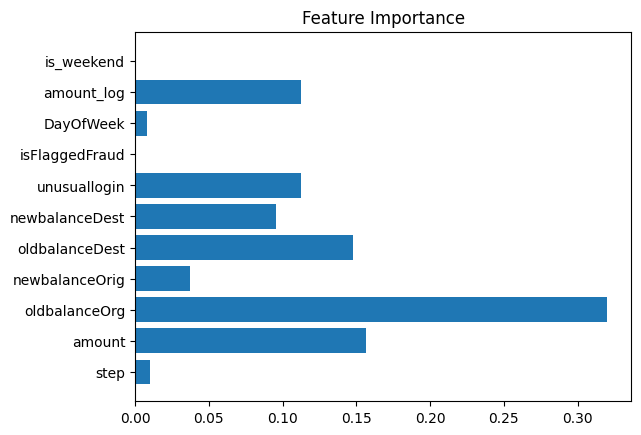

In [ ]:
import matplotlib.pyplot as plt

feature_importance = gbc.feature_importances_
plt.barh(X.columns, feature_importance)
plt.title('Feature Importance')
plt.show()

**UN-SUPERVISED LEARNING MODELS**
a. Isolation Forest

In [ ]:
#importing necessary libraries
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

In [ ]:
#importing necessary libraries
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

# Create a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

# Identify categorical and datetime columns
categorical_cols = df_encoded.select_dtypes(include=['object']).columns
datetime_cols = df_encoded.select_dtypes(include=['datetime64']).columns

# One-hot encode categorical features
if categorical_cols.size > 0:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Create OneHotEncoder instance
    encoded_data = encoder.fit_transform(df_encoded[categorical_cols])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

    # Drop original categorical columns and concatenate encoded features
    df_encoded = df_encoded.drop(categorical_cols, axis=1)
    df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

# Convert datetime columns to numeric (e.g., Unix timestamp)
for col in datetime_cols:
    df_encoded[col] = df_encoded[col].view(np.int64) // 10**9  # Convert to Unix timestamp (seconds)

# Now you can fit the IsolationForest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # Assume 10% of data is anomalous
iso_forest.fit(df_encoded)  # Use the encoded DataFrame

# Predict anomalies (-1 = anomaly, 1 = normal)
df['Anomaly_Score'] = iso_forest.predict(df_encoded)  # Use the encoded DataFrame
print(df['Anomaly_Score'].value_counts())

<ipython-input-63-cb6f4649b143>:25: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df_encoded[col] = df_encoded[col].view(np.int64) // 10**9  # Convert to Unix timestamp (seconds)


Anomaly_Score
 1    9114
-1    1013
Name: count, dtype: int64


In [ ]:
anomalies = df[df['Anomaly_Score'] == -1]
print("Number of anomalies detected:", len(anomalies))

Number of anomalies detected: 1013


**b. One- Class SVM**

In [ ]:
#importing necessary libraies
from sklearn.svm import OneClassSVM

In [ ]:
#load and scale the data for SVM to handle it effectively
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select only numeric features for scaling
numeric_features = df.select_dtypes(include=['number'])

# Fit and transform the scaler on numeric features only
scaled_features = scaler.fit_transform(numeric_features)

# Create a new DataFrame with scaled numeric features
scaled_df = pd.DataFrame(scaled_features, columns=numeric_features.columns, index=df.index)

# Concatenate scaled numeric features with original non-numeric features
df_scaled = pd.concat([df.drop(columns=numeric_features.columns), scaled_df], axis=1)

In [ ]:
#train one-class SVM
svm = OneClassSVM(kernel='rbf', gamma=0.01, nu=0.1)  # Radial basis kernel
svm.fit(scaled_features)

# Predict anomalies (-1 = anomaly, 1 = normal)
df['Anomaly_Score'] = svm.predict(scaled_features)
print(df['Anomaly_Score'].value_counts())

Anomaly_Score
 1    9114
-1    1013
Name: count, dtype: int64


In [ ]:
#Extract Anomaly rows for further inspections(Evaluate Results:)
anomalies = df[df['Anomaly_Score'] == -1]
print("Number of anomalies detected:", len(anomalies))

Number of anomalies detected: 1013


**c. Auto-Encoders(Deep Learning)**

In [ ]:
#importing the required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#preprocess the data
scaler = MinMaxScaler()

# Select only numeric features for scaling
numeric_features = df.select_dtypes(include=['number'])

# Fit and transform the scaler on numeric features only
scaled_data = scaler.fit_transform(numeric_features)

# Create a new DataFrame with scaled numeric features
scaled_df = pd.DataFrame(scaled_data, columns=numeric_features.columns, index=df.index)

# Concatenate scaled numeric features with original non-numeric features
df_scaled = pd.concat([df.drop(columns=numeric_features.columns), scaled_df], axis=1)

In [ ]:
#Building the AutoEncoder
input_dim = scaled_data.shape[1]

# Define the model architecture
autoencoder = models.Sequential([
    layers.InputLayer(input_shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(input_dim, activation='sigmoid')  # Output layer matches input dimension
])

autoencoder.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
#Training the Auoto-Encoder
autoencoder.fit(scaled_data, scaled_data, epochs=50, batch_size=32, shuffle=True)

Epoch 1/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0930
Epoch 2/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0120
Epoch 3/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0033
Epoch 4/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0028
Epoch 5/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0023
Epoch 6/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
Epoch 7/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016
Epoch 8/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0015
Epoch 9/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013
Epoch 10/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0014
Epoch 11/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012
Epoch 12/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012
Epoch 13/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012
Epoch 14/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012
Epoch 15/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [ ]:
#Detecting anomalies using reconstruction error
reconstructions = autoencoder.predict(scaled_data)
reconstruction_errors = tf.keras.losses.mse(scaled_data, reconstructions)

# Define threshold based on error distribution
threshold = np.percentile(reconstruction_errors, 90)

# Convert reconstruction_errors to a NumPy array before using .astype()
df['Anomaly_Score'] = (reconstruction_errors.numpy() > threshold).astype(int)
print(df['Anomaly_Score'].value_counts())  # 1 = anomaly, 0 = normal

317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Anomaly_Score
0    9114
1    1013
Name: count, dtype: int64


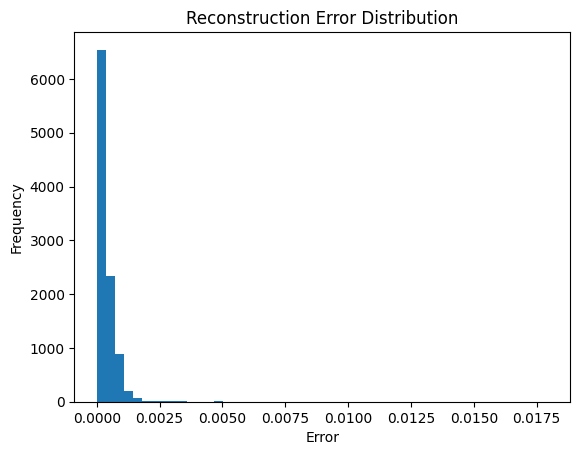

In [ ]:
#Visulaize errors
import matplotlib.pyplot as plt

plt.hist(reconstruction_errors, bins=50)
plt.title('Reconstruction Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

Since Graph based analysis involves resprsentation of data as nodes and edges:
Nodes : Entities (e.g. users, merchants, accounts etc)
Edges: Connections or relationships (e.g. transaction between accounts, shared IP address etc.)

**By analyzing these connections, you can identify patterns or unusual links that suggest fraudulent activity.**

In [ ]:
#insatlling the required libraries
!pip install networkx matplotlib

In [ ]:
#converting the transactional data into graph representations
import networkx as nx
import pandas as pd

# Preview the dataset
print(df.head())

# Create a graph object
G = nx.Graph()

# Check if the necessary columns exist in the DataFrame
if 'nameOrig' in df.columns and 'nameDest' in df.columns and 'amount' in df.columns:
    # If they exist, use them to add edges to the graph
    for _, row in df.iterrows():
        sender = row['nameOrig']  # Assuming 'nameOrig' represents the sender
        receiver = row['nameDest']  # Assuming 'nameDest' represents the receiver
        amount = row['amount']  # Edge attribute

        # Add an edge with transaction amount as an attribute
        G.add_edge(sender, receiver, weight=amount)
else:
    # If any of the columns are missing, print a warning
    print("Warning: 'nameOrig', 'nameDest', or 'amount' columns not found in DataFrame. "
          "Cannot create graph edges.")

   step     type          branch   amount     nameOrig  oldbalanceOrg  \
0     7  PAYMENT          Espana  1526.50  C1908839976            0.0   
1     7  PAYMENT        Honduras  1620.17    C70432899            0.0   
2     7  PAYMENT       Indonesia  5689.82   C332151172            0.0   
3     7  PAYMENT  Estados Unidos  2211.07  C1148172078            0.0   
4     7  PAYMENT  Estados Unidos   824.63  C1142006014            0.0   

   newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  ...  \
0             0.0  M1304522697             0.0             0.0  ...   
1             0.0   M252297858             0.0             0.0  ...   
2             0.0  M1430674428             0.0             0.0  ...   
3             0.0   M650835126             0.0             0.0  ...   
4             0.0   M745868137             0.0             0.0  ...   

   isFlaggedFraud  Acct type Date of transaction Time of day isFraud Column1  \
0               0    Savings          2018-01-03   Aft

In [ ]:
#Analysing the Graphs
#Node Degrees : Find accounts or entities with unusually high transaction activity
degrees = dict(G.degree())
print("Top accounts by activity:", sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10])

Top accounts by activity: [('C985934102', 68), ('C1590550415', 51), ('C1286084959', 50), ('C1899073220', 44), ('C977993101', 44), ('C1782113663', 43), ('C451111351', 43), ('C2083562754', 41), ('C1816757085', 40), ('C1360767589', 40)]


In [ ]:
#Community Detection
#Using clustering techniques to identify groups of entities
from networkx.algorithms.community import greedy_modularity_communities

communities = greedy_modularity_communities(G)
print("Number of communities detected:", len(communities))

Number of communities detected: 6490


In [ ]:
#Centrality Measures :
#Find influential nodes(e.g. hubs with suspicious transaction patterns)
import networkx as nx

# Subgraph focusing on nodes with high degrees (threshold of 5 for example)
subgraph_nodes = [node for node, degree in G.degree() if degree > 5]
subgraph = G.subgraph(subgraph_nodes)

# Approximate betweenness centrality calculation with limited paths
centrality = nx.betweenness_centrality(subgraph, k=100, normalized=True)

# Display top influential nodes
top_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top Influential Nodes:", top_centrality)

Top Influential Nodes: [('C10001825', 0.0005911047345767576), ('C22805895', 0.0), ('C1789550256', 0.0), ('C621014131', 0.0), ('C836514715', 0.0), ('C214774813', 0.0), ('C801142660', 0.0), ('C1730752455', 0.0), ('C766681183', 0.0), ('C863811613', 0.0)]


In [ ]:
#Anomaly Detection:
#Look for weakly connected or isolated nodes, as these might indicates suspicious activities
isolated_nodes = list(nx.isolates(G))
print("Isolated accounts:", isolated_nodes)

Isolated accounts: []


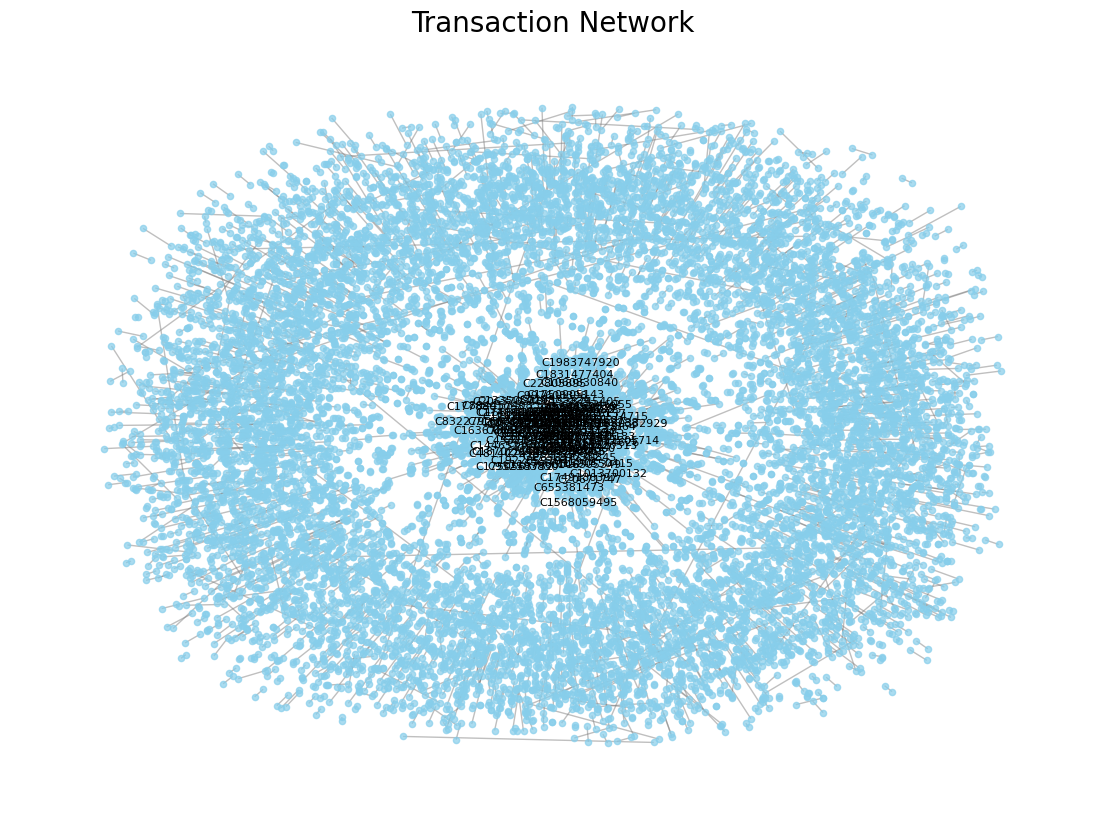

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# --- Better Visualization Settings ---
plt.figure(figsize=(14, 10))

# Generate layout (position of nodes)
pos = nx.spring_layout(G, k=0.15, iterations=20, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos,
                       node_size=20,
                       node_color='skyblue',
                       alpha=0.7)

# Draw edges
nx.draw_networkx_edges(G, pos,
                       edge_color='gray',
                       alpha=0.5)

# Draw labels (only for few important nodes to avoid clutter)
# Let's only label nodes with high degree (very connected ones)
degree_dict = dict(G.degree())
high_degree_nodes = [node for node, deg in degree_dict.items() if deg > 10]  # Change threshold if needed

labels = {node: node for node in high_degree_nodes}
nx.draw_networkx_labels(G, pos, labels,
                        font_size=8,
                        font_color='black')

plt.title("Transaction Network", fontsize=20)
plt.axis('off')
plt.show()


In [ ]:
subgraph_nodes = [node for node, degree in G.degree() if degree > 5]  # Example threshold
subgraph = G.subgraph(subgraph_nodes)

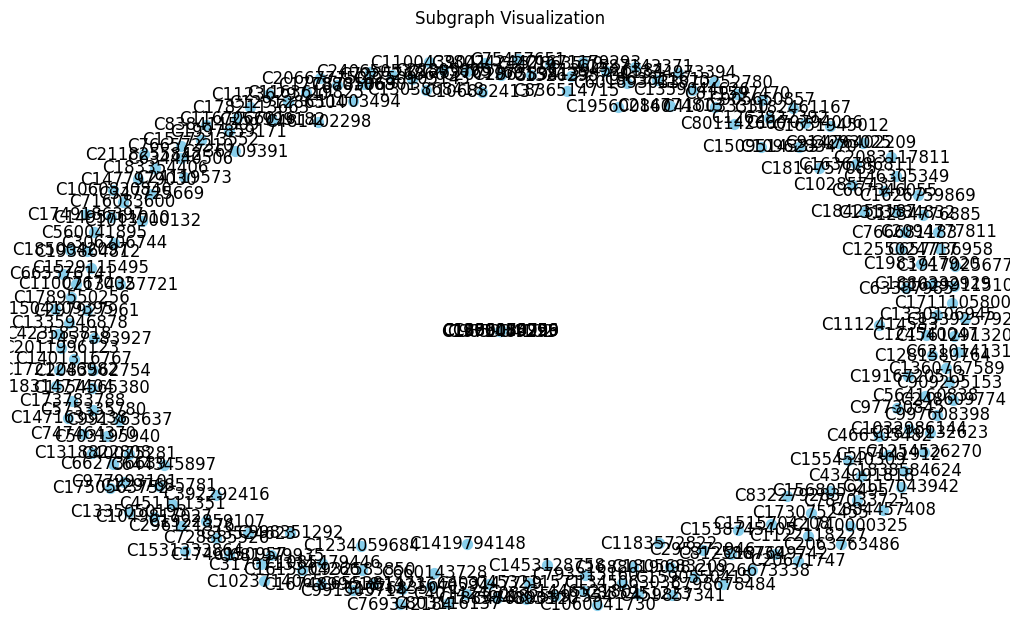

In [ ]:
import matplotlib.pyplot as plt

# Subgraph with fewer nodes (e.g., nodes with degree > 5)
subgraph_nodes = [node for node, degree in G.degree() if degree > 5]
subgraph = G.subgraph(subgraph_nodes)

# Plot the subgraph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_size=50, node_color="skyblue", edge_color="gray")
plt.title("Subgraph Visualization")
plt.show()